In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

In [4]:

import numpy as np

import pandas as pd


In [5]:
#reading the data
gas_turbines=pd.read_csv('gas_turbines.csv')
gas_turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [6]:
#standardizing the data

def zconv(x):
    temp=(x-x.mean())/x.std()
    return temp
data=zconv(gas_turbines.iloc[:,:])
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,-1.439730,-0.826616,1.281394,-0.921201,-1.379055,-1.488326,0.585221,-1.357286,0.531994,1.387799,-1.231132
1,-1.449553,-0.748623,1.304521,-0.921464,-1.363482,-1.482276,0.585221,-1.363631,0.568715,1.392956,-1.229868
2,-1.434674,-0.686227,1.219045,-0.944353,-1.351264,-1.476226,0.568696,-1.360911,0.552919,1.363540,-1.230500
3,-1.413655,-0.623832,1.169021,-0.946853,-1.348149,-1.464125,0.583950,-1.356379,0.548914,1.382832,-1.229868
4,-1.368648,-0.545839,1.161844,-0.924358,-1.354618,-1.458074,0.582678,-1.350940,0.574160,1.348546,-1.229868


In [7]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,0:10]
y = data.iloc[:,-1]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439730,-0.826616,1.281394,-0.921201,-1.379055,-1.488326,0.585221,-1.357286,0.531994,1.387799
1,-1.449553,-0.748623,1.304521,-0.921464,-1.363482,-1.482276,0.585221,-1.363631,0.568715,1.392956
2,-1.434674,-0.686227,1.219045,-0.944353,-1.351264,-1.476226,0.568696,-1.360911,0.552919,1.363540
3,-1.413655,-0.623832,1.169021,-0.946853,-1.348149,-1.464125,0.583950,-1.356379,0.548914,1.382832
4,-1.368648,-0.545839,1.161844,-0.924358,-1.354618,-1.458074,0.582678,-1.350940,0.574160,1.348546
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153144,-1.185388,1.401813,-0.865821,-1.498607,-2.063115,0.103449,-1.543109,1.145754,1.085714
15035,-1.303943,-1.138592,1.447705,-0.913440,-1.438712,-2.268829,-0.276629,-1.513196,1.293535,1.119905
15036,-1.386220,-1.076197,1.476921,-0.951457,-1.410920,-2.789165,-1.026616,-1.467873,2.695835,2.169990
15037,-1.420375,-0.998203,1.441542,-0.988815,-1.447576,-2.456392,-0.528319,-1.422551,1.924619,2.391085


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [10]:
# create model

model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# Compile model

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Fit the model

history2=model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
706/706 [==============================] - 4s 4ms/step - loss: 0.5730 - mae: 0.4966 - val_loss: 0.5405 - val_mae: 0.4661
Epoch 2/100
706/706 [==============================] - 2s 3ms/step - loss: 0.5568 - mae: 0.4757 - val_loss: 0.5398 - val_mae: 0.4626
Epoch 3/100
706/706 [==============================] - 2s 3ms/step - loss: 0.5565 - mae: 0.4742 - val_loss: 0.5395 - val_mae: 0.4618
Epoch 4/100
706/706 [==============================] - 2s 3ms/step - loss: 0.5561 - mae: 0.4728 - val_loss: 0.5392 - val_mae: 0.4601
Epoch 5/100
706/706 [==============================] - 2s 3ms/step - loss: 0.5559 - mae: 0.4721 - val_loss: 0.5395 - val_mae: 0.4612
Epoch 6/100
706/706 [==============================] - 2s 3ms/step - loss: 0.5558 - mae: 0.4714 - val_loss: 0.5390 - val_mae: 0.4593
Epoch 7/100
706/706 [==============================] - 2s 3ms/step - loss: 0.5557 - mae: 0.4710 - val_loss: 0.5391 - val_mae: 0.4594
Epoch 8/100
706/706 [==============================] - 2s 3ms/step - 

In [13]:
# evaluate the model

scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

329/329 [==============================] - 1s 2ms/step - loss: 0.5496 - mae: 0.4627
mae: 46.27%


In [14]:
# Visualize training history

# list all data in history
history2.history.keys()


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

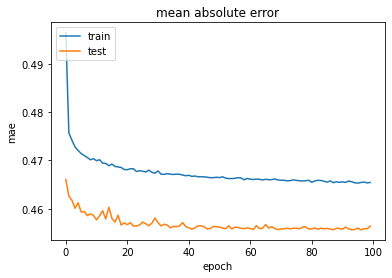

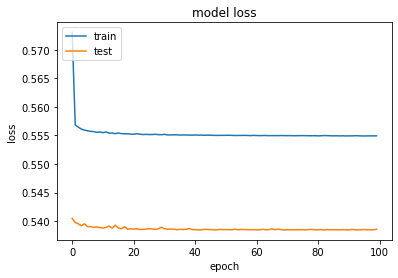

In [15]:
# summarize history for accuracy

import matplotlib.pyplot as plt
plt.plot(history2.history['mae'])
plt.plot(history2.history['val_mae'])
plt.title('mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [16]:
#predictions

pred=model.predict(x_test[:5])
print('predicted values: ',pred)
print('real values: ',y_test[:5])


predicted values:  [[5.0430252e-05]
 [1.0000000e+00]
 [1.4640107e-06]
 [1.3558626e-02]
 [8.6209070e-07]]
real values:  7052    -0.008115
13849    1.376622
13112   -0.026435
5268    -0.010642
8720    -0.003062
Name: TEY, dtype: float64


In [18]:
mse_neural,mae_neural=model.evaluate(x_test,y_test)
print('mean squared error: ',mse_neural*100)
print('mean absolute error: ',mae_neural*100)

141/141 [==============================] - 0s 3ms/step - loss: 0.5767 - mae: 0.4768
mean squared error:  57.66528248786926
mean absolute error:  47.682780027389526


## Here almost training and testing mae values are same